In [135]:
import pandas as pd
import numpy as np
import os
os.chdir("/Users/wrushabhgonnade/Downloads/Datasets")
from pandas_profiling import ProfileReport
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
df=pd.read_csv("bank.csv")

In [137]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [138]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [113]:
PR=ProfileReport(df)
PR.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

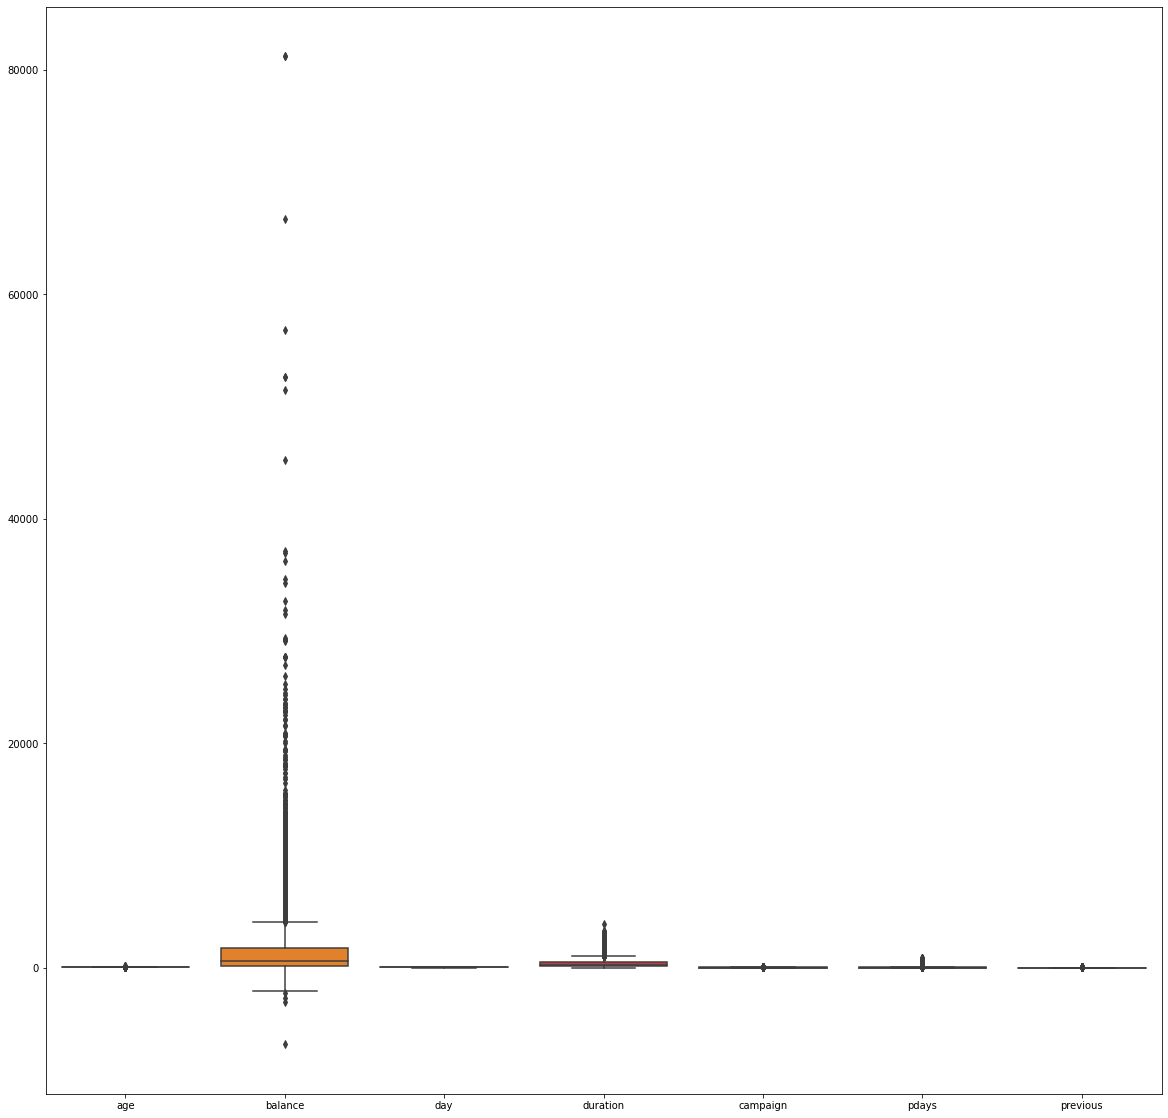

In [139]:
#Lets see is there any outliers or not
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=df, ax=ax)

In [140]:
# Let's remove some rows to remove some outliers
q=df['balance'].quantile(0.96)
df_new=df[df['balance']<q]

q=df['duration'].quantile(0.98)
df_new=df[df['duration']<q]


<AxesSubplot:>

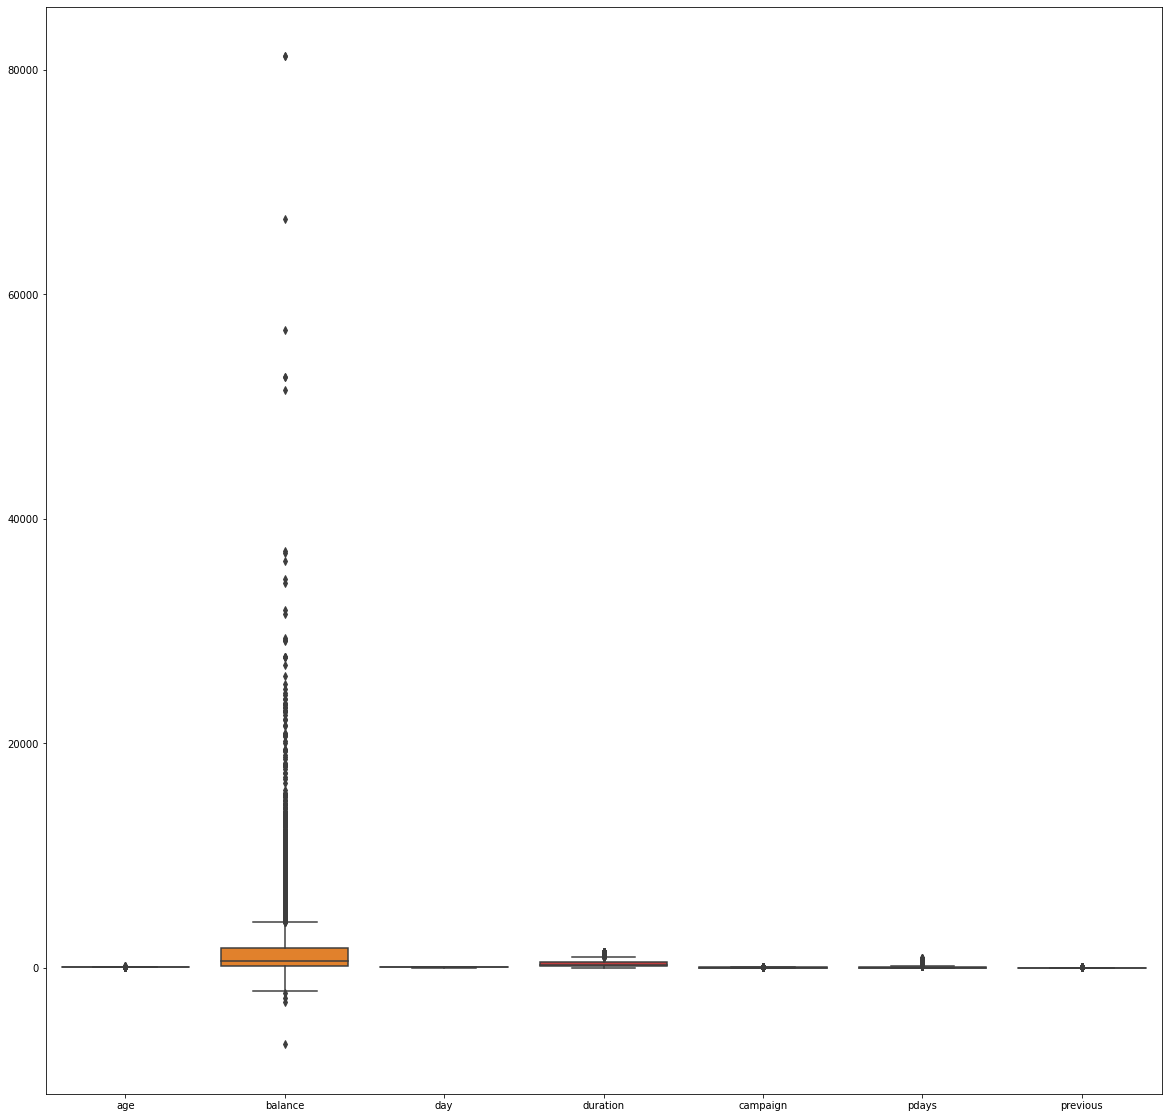

In [144]:
# Some outliers are decreased
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=df_new, ax=ax)

In [145]:
x=df.drop(columns='loan')
x

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,cellular,8,may,9,2,172,5,failure,no


In [146]:
y=df.loan
y

0         no
1         no
2         no
3         no
4         no
        ... 
11157     no
11158     no
11159     no
11160    yes
11161     no
Name: loan, Length: 11162, dtype: object

In [147]:
# Label Encoder
lbl_enc=LabelEncoder()

In [148]:
# Categorical Data
cat=[]
for col in x.columns:
    if x[col].dtype=="O":
        cat.append(col)

In [149]:
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [150]:
# for transforming Numerical data columns into categorical
for col in cat:
    x[col]=lbl_enc.fit_transform(x[col])

In [151]:
x

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,0,8,8,9,2,172,5,0,0


In [152]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
11157     no
11158     no
11159     no
11160    yes
11161     no
Name: loan, Length: 11162, dtype: object

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=100)

In [154]:
# Normal Model
dtc_model=DecisionTreeClassifier()

In [155]:
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [156]:
# Training Data Accuracy
dtc_model.score(x_train,y_train)

1.0

In [157]:
# Testing Data Accuracy
dtc_model.score(x_test,y_test)

0.7703792176769185

Our Model is Overfitted as there is lot of difference in training accuracy score and testing accuracy score

To overcome Overfitted model we have to tune parameters nd find best parameters we have to use hyperparameter tuning using GridSearchCV

In [158]:
# By Finding best parameters by Hyperparameter tuning using GridsearchCv
Desc_tree=DecisionTreeClassifier()

In [159]:
grid_param={"criterion":['gini','entropy'],
            "splitter":["best","random"],
            "max_depth":range(2,10,1),
            "min_samples_split":range(2,10,1),
            "min_samples_leaf":range(2,10,1),
            
}

In [160]:
grid_cv=GridSearchCV(estimator=Desc_tree,param_grid=grid_param,n_jobs=-1)

In [161]:
grid_cv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [162]:
grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [163]:
desc_tree_gridCv=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=4,min_samples_split=2,splitter='best')

In [164]:
desc_tree_gridCv.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4)

In [165]:
# Training Data Accuracy
desc_tree_gridCv.score(x_train,y_train)

0.8769998720081915

In [166]:
# Testing Data Accuracy
desc_tree_gridCv.score(x_test,y_test)

0.858763810092565

Now there is very less difference between training and testing data accuracy so our model is good to predict new data